In [45]:
import pandas as pd

# Cargar datos
df = pd.read_excel("e_Car_Data_extract_forClass.xlsx")

# Convertir nombres de columnas (por si tienen espacios)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Revisar valores nulos
print(df.isnull().sum())

Tier               0
FICO               0
Approve_Date       0
Term               0
Amount             0
Previous_APR       0
Car__Type          0
Competition_APR    0
Accept             0
APR                0
Prime              0
Partner_Bin        0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


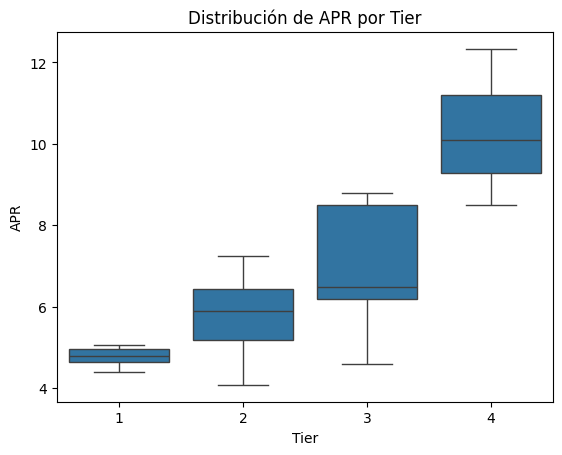

  Tier  Media_APR
0    1   4.781143
1    2   5.865294
2    3   7.087700
3    4  10.303333


/var/folders/1q/cnlyyxfj21z5f6b05g2cfcnm0000gn/T/ipykernel_75811/3939882434.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_apr = df.groupby('Tier')['APR'].mean().reset_index()


In [46]:
# Revisar asociación
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Tier', y='APR', data=df)
plt.title('Distribución de APR por Tier')
plt.show()

# Asegurarse de que Tier sea categórica (por si acaso)
df['Tier'] = pd.Categorical(df['Tier'])

# Calcular la media de APR por Tier
media_apr = df.groupby('Tier')['APR'].mean().reset_index()
media_apr.columns = ['Tier', 'Media_APR']

# Mostrar la tabla
print(media_apr)

In [47]:
#4.  Estimación del modelo: APR, FICO, Competition_APR, Tier, Amount

import pandas as pd
import statsmodels.api as sm

# Cargar datos
df = pd.read_excel("e_Car_Data_extract_forClass.xlsx")
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Limpiar y seleccionar variables
cols = ['Accept', 'APR', 'FICO', 'Competition_APR', 'Tier']
df_model = df[cols].dropna()

# Crear variables dummies para Tier (si es categórica)
if df_model['Tier'].dtype == 'object':
    df_model = pd.get_dummies(df_model, columns=['Tier'], drop_first=True)

# Separar X e y
X = df_model.drop(columns=['Accept'])
X = sm.add_constant(X)
y = df_model['Accept']

# Ajustar modelo logístico
model_with_tier = sm.Logit(y, X).fit()
print(model_with_tier.summary())



Optimization terminated successfully.
         Current function value: 0.485139
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Accept   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1535
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                  0.2530
Time:                        16:46:52   Log-Likelihood:                -747.11
converged:                       True   LL-Null:                       -1000.1
Covariance Type:            nonrobust   LLR p-value:                3.329e-108
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0265      6.837      1.613      0.107      -2.374      24.427
APR           

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [50]:
# Comparando ahora con un modelo sin Tier

X_base = df_model[['APR', 'FICO', 'Competition_APR']]
X_base = sm.add_constant(X_base)
model_base = sm.Logit(y, X_base).fit()
print(model_base.summary())

Optimization terminated successfully.
         Current function value: 0.499754
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Accept   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1536
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                  0.2305
Time:                        16:46:52   Log-Likelihood:                -769.62
converged:                       True   LL-Null:                       -1000.1
Covariance Type:            nonrobust   LLR p-value:                 1.341e-99
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              36.5465      5.750      6.355      0.000      25.276      47.817
APR           

In [55]:
## Calculando la tasa optima APR a ofrecer en un cliente con FICO 700, Tier = 2, monto $22.000 y un CF = 5,8

#En primer lugar hay que crear una nueva versión del modelo donde sí esté incorporada la variable Amount, debido a que en los ejemplos anteriores no estaba presente.
#Este nuevo modelo tendrá Accept como variable a predecir, y las variables explicativas serán APR, FICO, Competition_APR, Tier y Amount.

#4.  Estimación del modelo: APR, FICO, Competition_APR, Tier, Amount

# Cargar datos
df = pd.read_excel("e_Car_Data_extract_forClass.xlsx")
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Limpiar y seleccionar variables
cols = ['Accept', 'APR', 'FICO', 'Competition_APR', 'Tier', 'Amount']
df_model = df[cols].dropna()

# Crear variables dummies para Tier (si es categórica)
if df_model['Tier'].dtype == 'object':
    df_model = pd.get_dummies(df_model, columns=['Tier'], drop_first=True)

# Separar X e y
X = df_model.drop(columns=['Accept'])
X = sm.add_constant(X)
y = df_model['Accept']

# Ajustar modelo logístico
model_with_tier = sm.Logit(y, X).fit()
print(model_with_tier.summary())




Optimization terminated successfully.
         Current function value: 0.473270
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Accept   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1534
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                  0.2713
Time:                        16:50:50   Log-Likelihood:                -728.84
converged:                       True   LL-Null:                       -1000.1
Covariance Type:            nonrobust   LLR p-value:                5.110e-115
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.8343      6.997      2.120      0.034       1.121      28.547
APR           

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [56]:
### CÁLCULO CON LOS COEFICIENTES OBTENIDOS EN EL MODELO:

import numpy as np
from scipy.optimize import minimize_scalar

# Coeficientes del modelo logístico con Tier
beta_0 = 14.8343   # const
beta_APR = -1.4137
beta_FICO = -0.0096
beta_COMP = 0.3259
beta_TIER = 0.8881
beta_Amount = -0.0002

# Constantes del enunciado
CF = 5.8
fico = 700
tier = 2
Amount = 22000
competition_apr = 7.0  # puedes ajustarlo si tienes el valor real

# Función logística G(R)
def prob_aceptacion(R):
    z = (beta_0 +
         beta_APR * R +
         beta_FICO * fico +
         beta_COMP * competition_apr +
         beta_TIER * tier +
         beta_Amount * Amount)
    return 1 / (1 + np.exp(-z))

# Función de utilidad a maximizar
def utilidad_negativa(R):  # negativa porque scipy minimiza
    G = prob_aceptacion(R)
    return -1 * monto * (R - CF) * G

# Optimización en un rango razonable de tasas (6% a 20%)
resultado = minimize_scalar(utilidad_negativa, bounds=(6, 20), method='bounded')

# Resultados
R_optimo = resultado.x
utilidad_max = -resultado.fun

print(f"Tasa APR óptima: {R_optimo:.2f}%")
print(f"Utilidad esperada máxima: ${utilidad_max:,.2f}")

Tasa APR óptima: 6.65%
Utilidad esperada máxima: $3,065.44


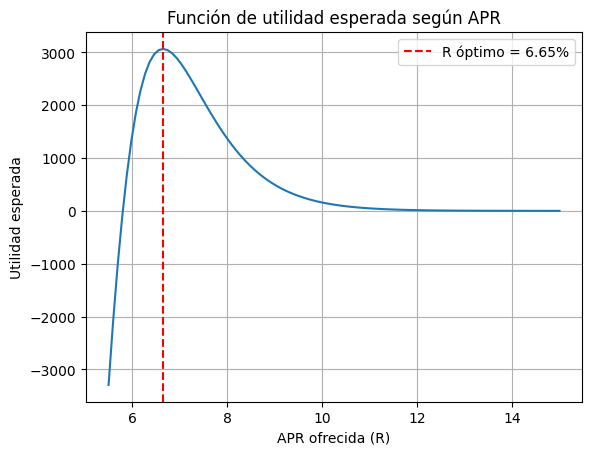

In [57]:
import matplotlib.pyplot as plt

r_vals = np.linspace(5.5, 15, 100)
utils = [-utilidad_negativa(r) for r in r_vals]

plt.plot(r_vals, utils)
plt.axvline(R_optimo, color='red', linestyle='--', label=f'R óptimo = {R_optimo:.2f}%')
plt.xlabel("APR ofrecida (R)")
plt.ylabel("Utilidad esperada")
plt.title("Función de utilidad esperada según APR")
plt.legend()
plt.grid()
plt.show()